In [1]:
#select where to run this notebook---
binder_or_localpc=True #True: if you want to run the script using binder or in your local PC
google_colab=False #True: if you want to run the script in google colab

In [2]:
%%capture
#!pip freeze. #to list the packages installed in colab
#or install without checking above (!but do it just once)---
if google_colab:
    !pip install numpy
    !pip install matplotlib
    !pip install netcdf4
    !pip install xarray
    !pip install cartopy
    !pip install shapely --upgrade --force-reinstall --no-binary shapely #https://github.com/SciTools/cartopy/issues/871

In [3]:
#install below packages in case you don't have them---
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import sys
from datetime import datetime
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely.geometry.polygon import LinearRing #for drawing a square 

In [4]:
#modify the local path in case you run this script in your computer---
if binder_or_localpc:
    main_dir="../"
if google_colab:
    #google colab path:
    mount_point='/content/gdrive/' #dir name for a temporal mount point (just for running this script)
    gdrive_path="MyDrive/colab_repos/" #the path in "my Google Drive" where you have cloned the repo
    main_dir=mount_point+gdrive_path
    #mount:
    from google.colab import drive
    drive.mount(mount_point)

In [5]:
#don't modify below names---
#AGU number:
agu_number="num" #put here the agu manuscript number
#name of the repository:
if binder_or_localpc: 
    dir_repo_name=""
if google_colab:
    #name of directories from the cloned github repo:
    dir_repo_name="paper_Atmospherically_Driven_Seasonal_Interannual_LTTS_MultipleInlet/"
dir_data="data/"
dir_figures="figures/"
#name of file with data:
file_clim_slp_wind="ncep_ncar_climatology_slp_wind.nc"

In [6]:
#create dir figures if it does not exists---
if not os.path.exists(main_dir+dir_repo_name+dir_figures):
    os.makedirs(main_dir+dir_repo_name+dir_figures)

In [7]:
glob_font_size=12
params = {'legend.fontsize':glob_font_size,
          'axes.titlesize':glob_font_size,'axes.labelsize': glob_font_size, #size of titles, x-y labels 
          'xtick.labelsize':glob_font_size-2,'ytick.labelsize':glob_font_size-2, #size of xtick-labels, ytick-labels
          'xtick.major.size':2,'xtick.major.width':.8, #length and width of xticks marks
          'ytick.major.size':2,'ytick.major.width':.8,} #length and width of yticks marks
mpl.rcParams.update(params)

In [8]:
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

In [9]:
#open data---
ds=xr.open_dataset(main_dir+dir_repo_name+dir_data+file_clim_slp_wind)
ds

<xarray.Dataset>
Dimensions:  (lat: 29, lon: 53, season: 2)
Coordinates:
  * lat      (lat) float32 10.0 12.5 15.0 17.5 20.0 ... 70.0 72.5 75.0 77.5 80.0
  * lon      (lon) float32 -80.0 -77.5 -75.0 -72.5 -70.0 ... 42.5 45.0 47.5 50.0
  * season   (season) object 'Autumn-Winter (Sep-Feb)' 'Spring-Summer (Mar-Aug)'
Data variables:
    slp      (season, lat, lon) float64 ...
    u10      (season, lat, lon) float64 ...
    v10      (season, lat, lon) float64 ...
Attributes:
    general_info:  Climatology based on ncep-ncar 1980-2015. u10, v10 were ob...

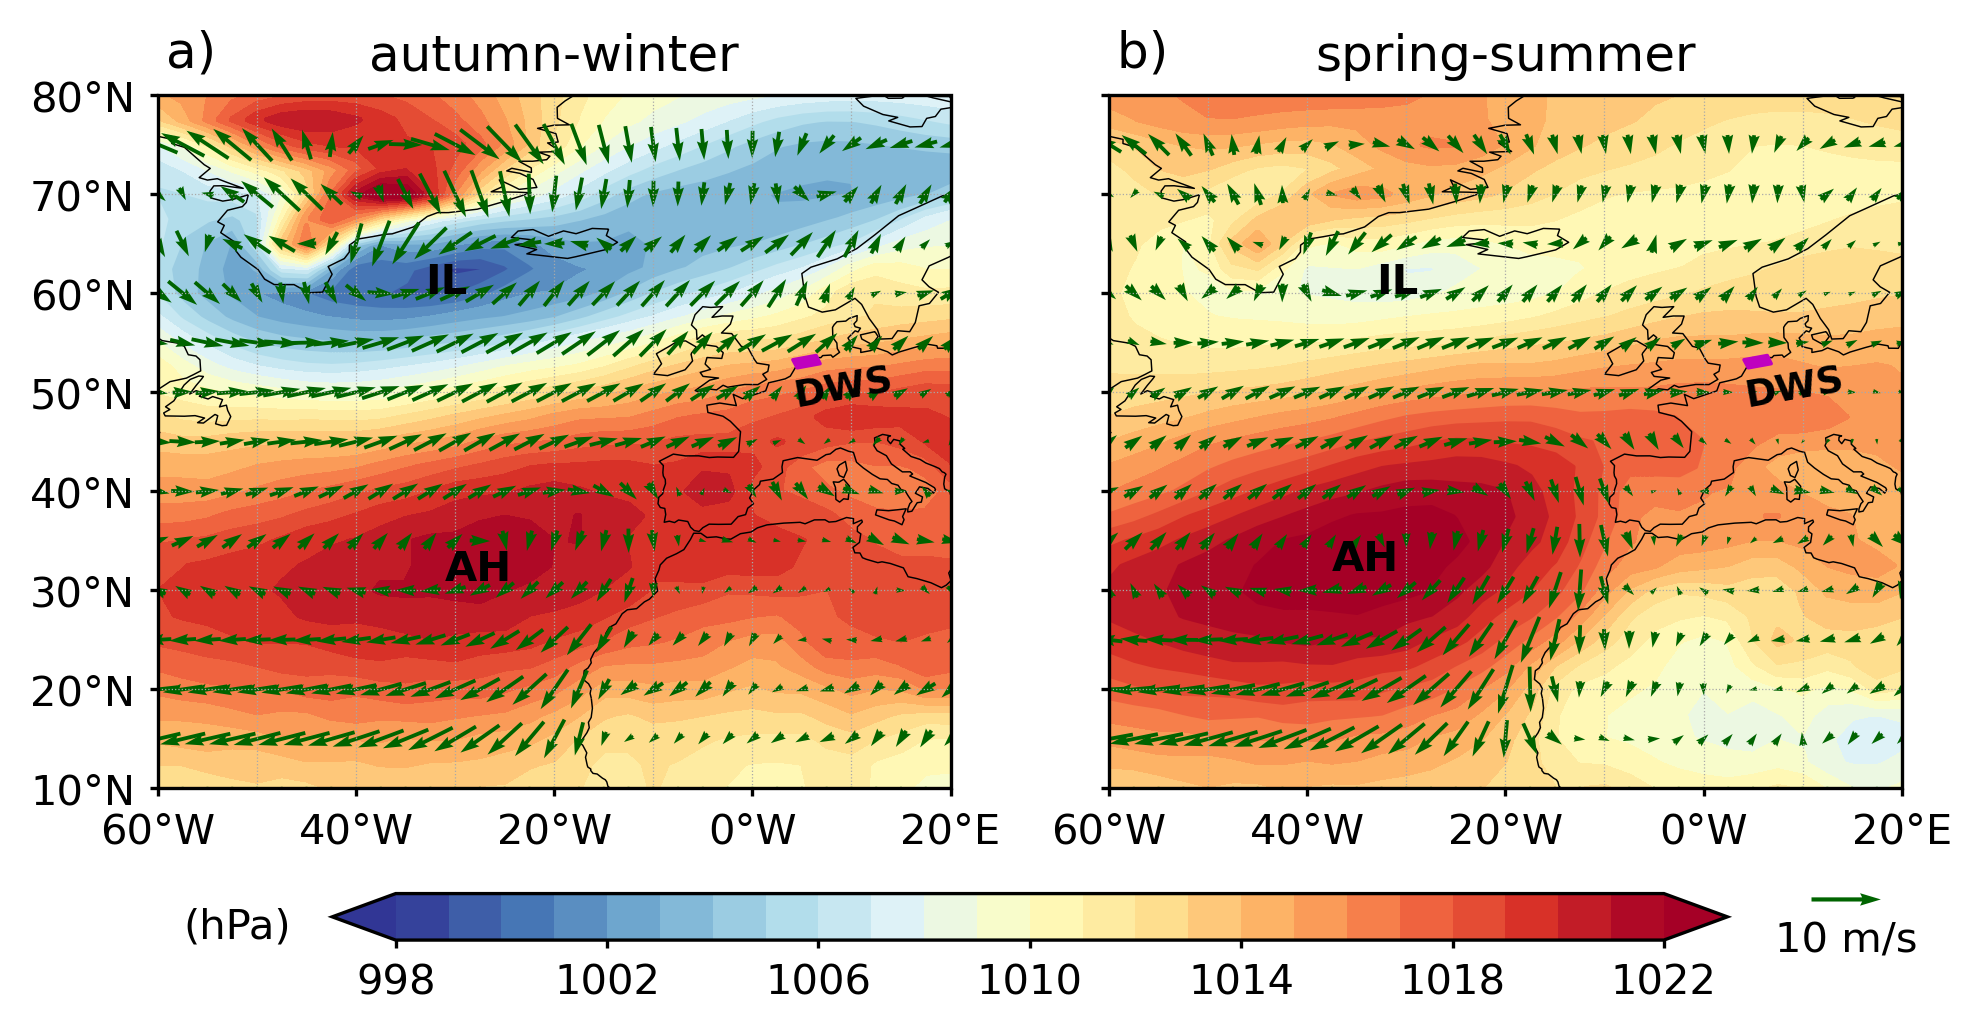

In [10]:
#DWS numerical domain (the same as above)
lons = [4.469283, 6.789564, 6.387093, 4.025996]
lats = [52.497467, 52.923164, 53.760746, 53.3269]
ring = LinearRing(list(zip(lons, lats)))
#
levels_contourf=np.arange(998,1023,1)
cmap='RdYlBu_r'
units='height';width=0.0055;scale=100
xx,yy=np.meshgrid(ds.lon.values,ds.lat.values)
k=1;j=2
#
axs=[]
fig,ax=plt.subplots(1,2,figsize=(7.5,7),subplot_kw={'projection':ccrs.PlateCarree()},dpi=300)
for i in range(2):
    #cs=ds.slp.isel(season=i).plot.contourf(ax=ax[i],cmap=cmap,levels=levels_contourf,transform=ccrs.PlateCarree(),extend="both",add_colorbar=False,zorder=0) 
    cs=ax[i].contourf(ds.slp.lon,ds.slp.lat,ds.slp.isel(season=i),cmap=cmap,levels=levels_contourf,transform=ccrs.PlateCarree(),extend="both",zorder=0) 
    ax[i].coastlines(lw=.35,color='k',zorder=0,resolution='110m')
    ax[i].add_geometries([ring],ccrs.PlateCarree(),facecolor='m',edgecolor='m',zorder=1,lw=0.8)
    #q=ds.isel(season=i).plot.quiver(ax=ax[i],x="lon", y="lat", u="u10",v="v10",units=units,width=width,scale=scale,color='darkgreen',pivot='mid',add_guide=False,transform=ccrs.PlateCarree(),zorder=2)
    #q=ax[i].quiver(ds.lon,ds.lat,ds.isel(season=i).u10,ds.isel(season=i).v10,units=units,width=width,scale=scale,color='darkgreen',pivot='mid',transform=ccrs.PlateCarree(),zorder=2)
    q=ax[i].quiver(xx[::j,::k],yy[::j,::k],ds.isel(season=i).u10.values[::j,::k],ds.isel(season=i).v10.values[::j,::k],units=units,width=width,scale=scale,color='darkgreen',pivot='mid',transform=ccrs.PlateCarree(),zorder=2)
    if i==1:
        #just to increase the size of the quiver key and reduce the fontsize
        q=ax[i].quiver(ds.lon,ds.lat,ds.isel(season=i).u10*np.nan,ds.isel(season=i).v10*np.nan,units=units,width=0.006,scale=scale,color='darkgreen',pivot='mid',transform=ccrs.PlateCarree(),zorder=2)
        qk = ax[i].quiverkey(q, .93, -.16, 10, '', labelpos='S')
        ax[i].text(.93,-.22,"10 m/s",horizontalalignment='center',verticalalignment='center', transform=ax[i].transAxes,fontsize=glob_font_size-2)
    ax[i].text(lons[0]-.5,lats[0]-4,"DWS",rotation=10,fontsize=glob_font_size-3,fontweight='bold', transform=ccrs.PlateCarree())
    ax[i].text(-33,60,"IL",fontsize=glob_font_size-2,fontweight='bold', transform=ccrs.PlateCarree())
    if i==1: 
        title="spring-summer"; lab="b) "
        ax[i].text(-37.5,32,"AH",fontsize=glob_font_size-2,fontweight='bold', transform=ccrs.PlateCarree())
    else:
        title="autumn-winter"; lab="a) " 
        ax[i].text(-31,31,"AH",fontsize=glob_font_size-2,fontweight='bold', transform=ccrs.PlateCarree())
    ax[i].xaxis.set_major_formatter(lon_formatter); ax[i].yaxis.set_major_formatter(lat_formatter)
    gl=ax[i].gridlines(draw_labels=False,crs=ccrs.PlateCarree(),linewidth=.3,linestyle=':',color='darkgray')
    if i==1: ax[i].set_yticklabels("")
    ax[i].set_xticks(np.arange(-80,80,20), crs=ccrs.PlateCarree())
    ax[i].set_yticks(np.arange(10,90,10), crs=ccrs.PlateCarree())
    ax[i].set_extent([-60,20,10,80],ccrs.PlateCarree())
    ax[i].set_xlabel(""); ax[i].set_ylabel(""); ax[i].set_title(f"{title}")
    ax[i].text(0.01,1.04,lab,transform=ax[i].transAxes,fontsize=glob_font_size)
    axs+=[ax[i]]
    if i==1: cbar=fig.colorbar(cs,ax=axs,ticks=np.arange(998,1023,4),aspect=30,pad=0.065,shrink=.8,orientation='horizontal');
    if i==0: ax[i].text(.1,-.2,"(hPa)",fontsize=glob_font_size-2,horizontalalignment='center',verticalalignment='center', transform=ax[i].transAxes)
    for c in cs.collections: c.set_edgecolor("face") #fix for the white lines between contourf levels  
#
fig_name='f07'
fig.savefig(f'{main_dir}{dir_repo_name}{dir_figures}{agu_number}-{fig_name}.jpg',bbox_inches='tight',pad_inches=0.1,dpi=600)
fig.savefig(f'{main_dir}{dir_repo_name}{dir_figures}{agu_number}-{fig_name}.pdf',bbox_inches='tight',pad_inches=0.1,dpi=600)